In [1]:
import pandas as pd
import re
df_train = pd.read_csv("BBC News Train.csv")
df_test = pd.read_csv("BBC News Test.csv")
Sample_Set = pd.read_csv("BBC News Sample Solution.csv")

In [2]:
print("Read training data.....")
df_train.head()

Read training data.....


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
print("Read testing data.....")
df_test.head()

Read testing data.....


,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [4]:
print("Sample Set data.....")
Sample_Set.head()

Sample Set data.....


,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,business
3,459,entertainment
4,1020,politics


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [7]:
Sample_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Category   735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [8]:
df_train['CategoryID'] = df_train['Category'].factorize()[0] 
df_train.head()

,ArticleId,Text,Category,CategoryID
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


## Exploratory Data Analysis (EDA)

In [10]:
#The below graph shows the news article count for category from our dataset.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#There are five news categories i.e. Sports, Business, Politics, Entertainment, Tech.
print('Number of articles per topic:-')
df_count = pd.DataFrame(df_train['Category'].value_counts())
df_count

Number of articles per topic:-


,count
Category,
sport,346
business,336
politics,274
entertainment,273
tech,261


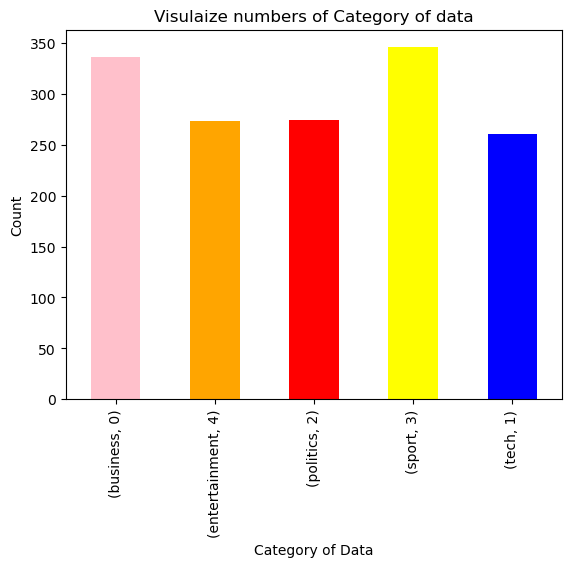

In [11]:
df_train.groupby('Category').CategoryID.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of Data")
plt.ylabel("Count")
plt.title("Visulaize numbers of Category of data")
plt.show()

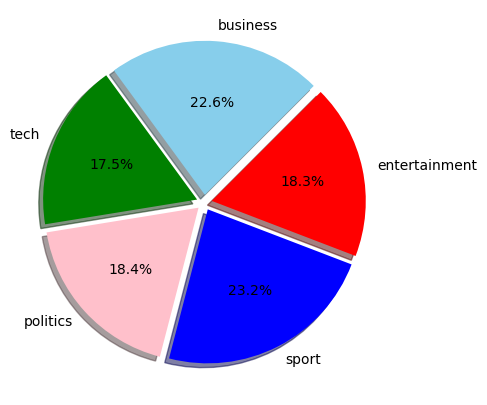

In [12]:
fig = plt.figure(figsize = (5,5))
colors = ["skyblue", "Green", "Pink", "Blue", "Red"]
business = df_train[df_train['CategoryID'] == 0 ]
tech = df_train[df_train['CategoryID'] == 1 ]
politics = df_train[df_train['CategoryID'] == 2]
sport = df_train[df_train['CategoryID'] == 3]
entertainment = df_train[df_train['CategoryID'] == 4]
count = [business['CategoryID'].count(), tech['CategoryID'].count(), politics['CategoryID'].count(), 
         sport['CategoryID'].count(), entertainment['CategoryID'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

In [13]:
df_train = df_train.drop_duplicates(subset=['Text'])

In [14]:
pd.DataFrame(df_train['Category'].value_counts())

,count
Category,
sport,342
business,335
politics,266
entertainment,263
tech,234


In [15]:
print('*'*40)
print('Sample text:')
print('*'*40)
print(df_train['Text'][0])

print('\n'+'*'*40)
print('Frequency of punctuation marks in sample text:')
print('*'*40)
[print("  {} is {} times".format(df_count,df_train['Text'][0].count(df_count))) for df_count in ['.',',',';','?',':','!','"',"'",")","("]];

from collections import Counter
print('\n'+'*'*40)
print('Most common words in sample text:')
print('*'*40)
for word, count in Counter(df_train['Text'][0].split()).most_common(4):
    print("  '{}' is {} times".format(word, count))

****************************************
Sample text:
****************************************
worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she sa

In [16]:
pip install wordninja

Note: you may need to restart the kernel to use updated packages.


In [17]:
import nltk
import re
from bs4 import BeautifulSoup
import string
import wordninja as wn #Probabilistically split concatenated words
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob # TextBlob works amazingly as a sentiment analyzer.
import string

In [18]:
nltk.download('stopwords') 
from nltk.corpus import stopwords
allstopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Test\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
def preprocessing(sentence):
    # make smallercase
    sentence = sentence.lower()

    # remove emails
    sentence = re.sub(r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", '', sentence)

    # remove mentions
    sentence = re.sub(r"@[A-Za-z0-9]+","", sentence)

    # Remove html
    sentence = BeautifulSoup(sentence, 'lxml').get_text().strip()

    # Remove URL
    sentence = re.sub(r'https?://\S+|www\.\S+', '', sentence)

    # Removing punctutation
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))

    # Remove non-alphabetic characters
    sentence = re.sub(r'[^a-zA-Z ]', '', sentence)

    # Spliting words into two meaningful word
    sentence = ' '.join(wn.split(str(sentence)))

    #Correct the sentence
    sentence =  str(TextBlob(sentence).correct())
 # decontracted

    ## specific
    sentence = re.sub(r"wont", "will not", sentence)
    sentence = re.sub(r"wouldnt", "would not", sentence)
    sentence = re.sub(r"shouldnt", "should not", sentence)
    sentence = re.sub(r"couldnt", "could not", sentence)
    sentence = re.sub(r"cudnt", "could not", sentence)
    sentence = re.sub(r"cant", "can not", sentence)
    sentence = re.sub(r"dont", "do not", sentence)
    sentence = re.sub(r"doesnt", "does not", sentence)
    sentence = re.sub(r"didnt", "did not", sentence)
    sentence = re.sub(r"wasnt", "was not", sentence)
    sentence = re.sub(r"werent", "were not", sentence)
    sentence = re.sub(r"havent", "have not", sentence)
    sentence = re.sub(r"hadnt", "had not", sentence)

    ## general
    sentence = re.sub(r"n\ t", " not", sentence)
    sentence = re.sub(r"\re", " are", sentence)
    sentence = re.sub(r"\ s ", " is ", sentence) 
    sentence = re.sub(r"\ d ", " would ", sentence)
    sentence = re.sub(r"\ ll ", " will ", sentence)
    sentence = re.sub(r"\dunno", "do not ", sentence)
    sentence = re.sub(r"ive ", "i have ", sentence)
    sentence = re.sub(r"im ", "i am ", sentence)
    sentence = re.sub(r"i m ", "i am ", sentence)
    sentence = re.sub(r" w ", " with ", sentence)
    
    # Punctuation Removal
    sentence = "".join(i for i in sentence if i not in string.punctuation)
    # Stop Word Removal
    sentence = " ".join(i for i in sentence.split() if i not in allstopwords)


    # Lemmatize
    lm = WordNetLemmatizer()
    snt = ' '.join([lm.lemmatize(i) for i in sentence.split()])
    return snt

In [20]:
# Apply the preprocessing to the 'Text' column
df_train['Cleaned_Text'] = df_train['Text'].apply(preprocessing)
df_train.head()

,ArticleId,Text,Category,CategoryID,Cleaned_Text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0,world com ex bos launched defence lawyer defen...
1,154,german business confidence slides german busin...,business,0,german business confidence side german busines...
2,1101,bbc poll indicates economic gloom citizens in ...,business,0,bc poll indicates economic gloom citizen major...
3,1976,lifestyle governs mobile choice faster bett...,tech,1,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,0,union boss pay eighteen former union director ...


In [21]:
print('*** 3 Sample texts after cleaning: ***')
[print(df_train['Text'][i]+'\n') for i in range(3)]

*** 3 Sample texts after cleaning: ***
worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures 

[None, None, None]

#### Basic inspection of the number of words

We will now inspect the word count in the dataset as a whole and per category.

In [23]:
pd.options.mode.chained_assignment = None
df_train['word count'] = df_train['Text'].apply(lambda row: len(row.split()))
df_train['char count'] = df_train['Text'].apply(lambda row: len(row))
pd.options.mode.chained_assignment = 'warn'
print("Training set including number of word and number of characters per entry: ")
df_train

Training set including number of word and number of characters per entry: 


,ArticleId,Text,Category,CategoryID,Cleaned_Text,word count,char count
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0,world com ex bos launched defence lawyer defen...,301,1866
1,154,german business confidence slides german busin...,business,0,german business confidence side german busines...,325,2016
2,1101,bbc poll indicates economic gloom citizens in ...,business,0,bc poll indicates economic gloom citizen major...,514,3104
3,1976,lifestyle governs mobile choice faster bett...,tech,1,lifestyle governs mobile choice faster better ...,634,3618
4,917,enron bosses in $168m payout eighteen former e...,business,0,union boss pay eighteen former union director ...,355,2190
...,...,...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,4,double election big brother model caprice holy...,223,1266
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,4,double act reap chart show j joel taking bc ra...,558,3111
1487,1590,weak dollar hits reuters revenues at media gro...,business,0,weak dollar hit renter revenue medium group re...,237,1370
1488,1587,apple ipod family expands market apple has exp...,tech,1,apple upon family expands market apple expande...,560,3242


In [24]:
print("Statistics about characters and word count in training set: ")

df_train.describe()

Statistics about characters and word count in training set: 


,ArticleId,CategoryID,word count,char count
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,1118.146528,1.975000,385.215972,2234.261806
std,642.822120,1.435938,212.167106,1211.698556
min,2.000000,0.000000,90.000000,501.000000
25%,560.750000,1.000000,253.000000,1451.250000
50%,1111.000000,2.000000,337.000000,1964.000000
75%,1681.250000,3.000000,468.250000,2754.000000
max,2224.000000,4.000000,3345.000000,18387.000000


In [25]:
data = df_train['word count']
data

0       301
1       325
2       514
3       634
4       355
       ... 
1485    223
1486    558
1487    237
1488    560
1489    295
Name: word count, Length: 1440, dtype: int64

D:\Installed\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Installed\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


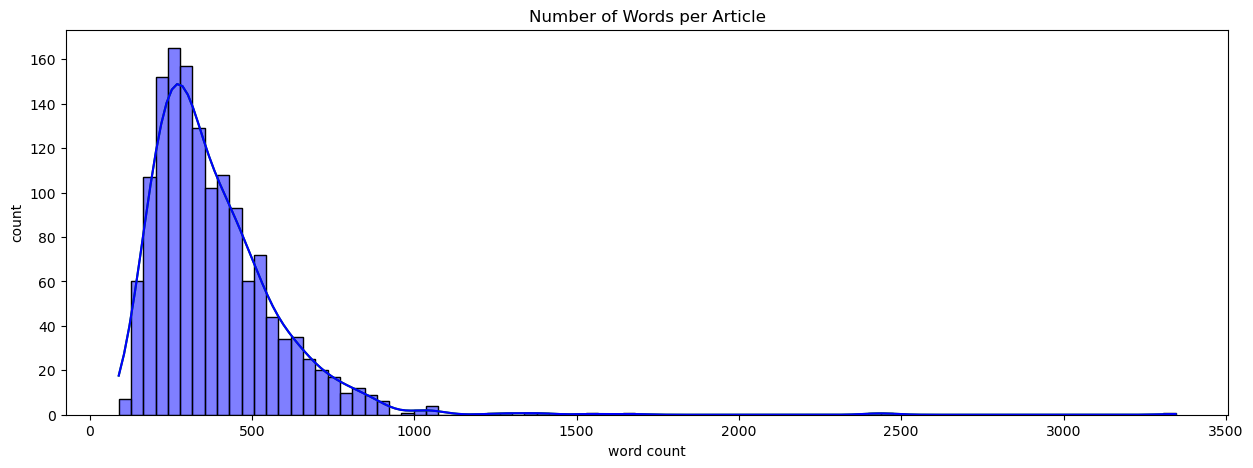

In [26]:
# Creating the figure and axes
fig = plt.subplots(figsize=(15, 5))

# Creating the histogram with KDE overlay
sns.histplot(data, kde=True, color='white')

# Customizing the KDE line color
kde = sns.histplot(data, kde=True, color='blue')
kde_lines = kde.get_lines()
kde_lines[0].set_color('green')

# Adding labels and title
plt.xlabel('word count')
plt.ylabel('count')
plt.title('Number of Words per Article')

# Displaying the plot
plt.show()

Let us now examine the word count statistics by category

In [28]:
print('Word count statistics by category:')
df_categoty = df_train[['Category','word count']].groupby('Category')
df_categoty.describe()

Word count statistics by category:


word count                                                \
                   count        mean         std    min     25%    50%   
Category                                                                 
business           335.0  334.274627  133.713125  145.0  253.00  304.0   
entertainment      263.0  335.444867  207.134549  144.0  229.00  271.0   
politics           266.0  451.642857  261.490785   90.0  320.25  445.0   
sport              342.0  336.877193  185.930006  116.0  211.50  296.5   
tech               234.0  509.222222  212.922747  188.0  345.25  461.5   

                               
                  75%     max  
Category                       
business       391.50   902.0  
entertainment  380.00  2448.0  
politics       527.75  3345.0  
sport          416.75  1671.0  
tech           633.75  1549.0

D:\Installed\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Installed\Anaconda\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Installed\Anaconda\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Installed\Anaconda\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

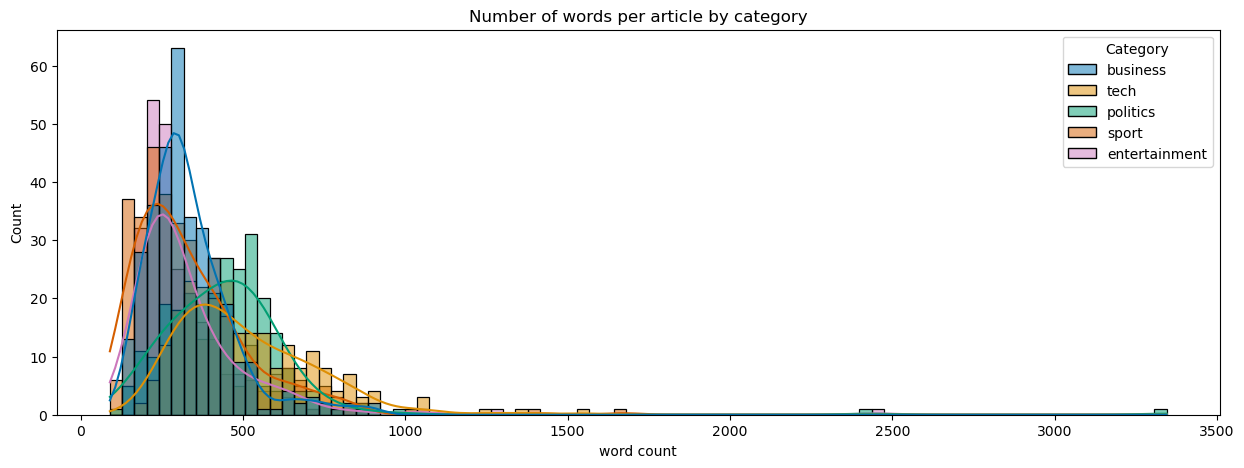

In [29]:
fig = plt.subplots(figsize=(15, 5))
sns.histplot(data = df_train, x = 'word count', palette = 'colorblind', kde=True, hue = 'Category')
plt.title("Number of words per article by category")
plt.show()

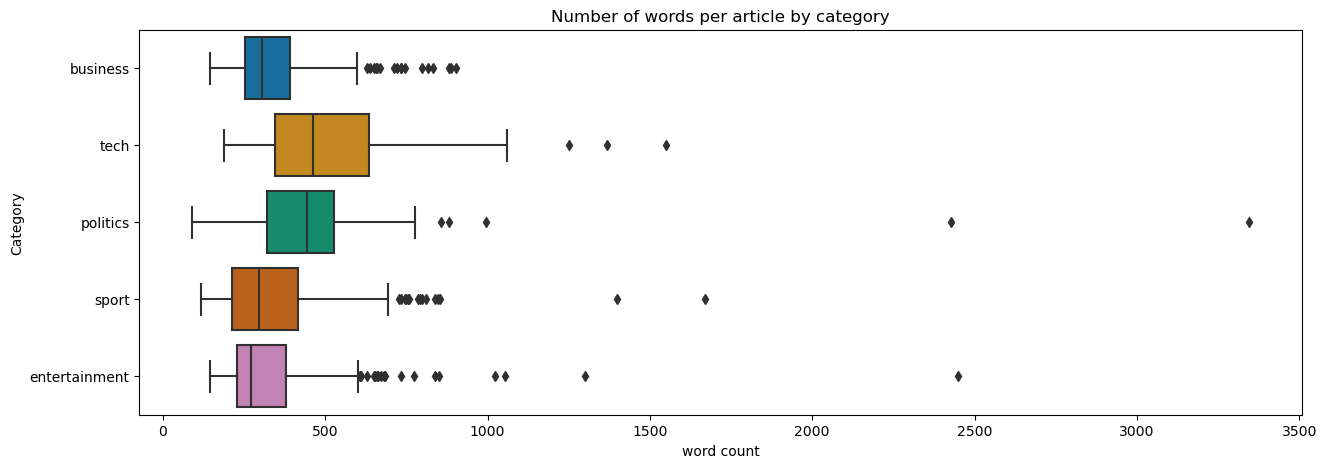

In [30]:
# words per category
fig = plt.subplots(figsize=(15, 5))
sns.boxplot(data = df_train, x = 'word count', y = 'Category', palette = 'colorblind')
plt.title('Number of words per article by category')
plt.show()

#### Word count Matrix

We will now convert the text into a matrix. We will actually build 2 matrices where each column represents a word and each row represents a document. In this first part, we create and inspect the word count matrix WC, which is a very sparse matrix. This matrix contains the number of times each word is present in each article.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer() 
WC=cv.fit_transform(df_train['Cleaned_Text'])
print('There are {} documents in the training set.'.format(len(df_train)))
print('There are {} different words in the training set.'.format(WC.shape[1]))
print('The sparse Matrix WC has size {} and its sparsity is {:.2f}%. '.format(WC.shape,100*(1-WC.count_nonzero()/np.prod(WC.shape))))
print('\nCorresponding DataFrame to WC:')
counts_df = pd.DataFrame(WC.A,columns=cv.get_feature_names_out ())
counts_df

There are 1440 documents in the training set.
There are 15014 different words in the training set.
The sparse Matrix WC has size (1440, 15014) and its sparsity is 99.00%. 

Corresponding DataFrame to WC:


,aaliyah,aaron,abacus,abandon,abandoned,abandoning,abandonment,abbasi,abbe,abbott,...,zheg,zimbabwe,zinc,zinedine,zip,zodiac,zoellick,zone,zonealarm,zvonareva
0,0,0,0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
print('The most popular words amog all documents are are:')
print('\nword  count')
print(counts_df.sum().sort_values().tail(10))

The most popular words amog all documents are are:

word  count
one       1241
people    1246
noto      1294
new       1349
also      1376
would     1925
mr        2080
year      2108
said      4726
nothe     5793
dtype: int64


A seen above, the most popular words are uninformative about the topics. This is why we do not use the raw word count, but we scale it by the inverse term frequency, so that more weight is given to words that are unique or seldom to each document. Actually, since we have the labels indicating categories, if we could find words that were unique to each category and present in most of the articles within their category, we can build a very simple classifier. Normally, this wouldn't be the case (i.e., topic extraction is an application of unsupervised learning). But since we have the text categories (topics), let us check if there are words unique to each topic and how popular they are!

### Word count by term-frequency-inverse document frequency

#### Application of term-frequency-inverse document frequency without filtering words

We will now apply this technique to the training dataset and get a weighted version of WC which we will call WC2.

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer 

tfidf_transformer = TfidfTransformer()
WC2 = tfidf_transformer.fit_transform(WC)

tfidf_df = pd.DataFrame(WC2.A, columns  = cv.get_feature_names_out())
print("WC2 matrix representation: ")
tfidf_df

WC2 matrix representation: 


,aaliyah,aaron,abacus,abandon,abandoned,abandoning,abandonment,abbasi,abbe,abbott,...,zheg,zimbabwe,zinc,zinedine,zip,zodiac,zoellick,zone,zonealarm,zvonareva
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.406589,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
print("Ranking of word scores in WC2: ")
print("\n->column sum:")
print(tfidf_df.sum().sort_values().tail())

Ranking of word scores in WC2: 

->column sum:
would    30.800377
year     33.847791
mr       40.676880
said     58.932917
nothe    65.187653
dtype: float64


Again, common words have the highest overall score (maybe it would be better to remove popular english words?). However, we can confirm that the individual values have been appropiately weighted by the inverse term frequency. Let us check those weights.

In [39]:
print("Weights given to words by idf:")
pd.DataFrame(tfidf_transformer.idf_,
            cv.get_feature_names_out(),
            columns = ["idf_weights"]).sort_values(by="idf_weights")

Weights given to words by idf:


,idf_weights
nothe,1.050527
said,1.160765
year,1.412429
would,1.577294
also,1.594750
...,...
litchfield,7.579945
listens,7.579945
liquor,7.579945
locatio,7.579945


#### Testing Data

In [41]:
# Apply the preprocessing to the 'Text' column on text data
#df_test['Cleaned_Text'] = df_test['Text'].apply(preprocessing)
#df_test.head()

,ArticleId,Text,Cleaned_Text
0,1018,qpr keeper day heads for preston queens park r...,keeper day head preston queen park ranger keep...
1,1319,software watching while you work software that...,software watching work software monitor every ...
2,1138,d arcy injury adds to ireland woe gordon d arc...,arcy injury add ireland woe gordon would arcy ...
3,459,india s reliance family feud heats up the ongo...,india reliance family fed heat going public sp...
4,1020,boro suffer morrison injury blow middlesbrough...,bore suffer morrison injury blow middlesbrough...


We will now apply this technique to the training dataset and get a weighted version of WC_t which we will call WC2_t.

In [43]:
#WC_t=cv.fit_transform(df_test['Cleaned_Text'])
#print('There are {} documents in the training set.'.format(len(df_test)))
#print('There are {} different words in the training set.'.format(WC_t.shape[1]))
#print('The sparse Matrix WC_t has size {} and its sparsity is {:.2f}%. '.format(WC_t.shape,100*(1-WC_t.count_nonzero()/np.prod(WC_t.shape))))
#print('\nCorresponding DataFrame to WC:')
#counts_df_t = pd.DataFrame(WC_t.A,columns=cv.get_feature_names_out ())
#counts_df_t

There are 735 documents in the training set.
There are 12083 different words in the training set.
The sparse Matrix WC_t has size (735, 12083) and its sparsity is 98.73%. 

Corresponding DataFrame to WC:


,aaron,abandon,abandoned,abandoning,abandonment,abate,abatement,abbasi,abbe,abbey,...,zephyr,zero,zest,zheg,zherkov,zimbabwe,zip,zodiac,zone,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#from sklearn.feature_extraction.text import TfidfTransformer 

#tfidf_transformer = TfidfTransformer()
#WC2_t = tfidf_transformer.fit_transform(WC_t)

#tfidf_test = pd.DataFrame(WC2_t.A, columns  = cv.get_feature_names_out())
#print("WC2_t matrix representation: ")
#tfidf_test

WC2_t matrix representation: 


,aaron,abandon,abandoned,abandoning,abandonment,abate,abatement,abbasi,abbe,abbey,...,zephyr,zero,zest,zheg,zherkov,zimbabwe,zip,zodiac,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Category'] = le.fit_transform(df_train['Category'])
df_train.head()

,ArticleId,Text,Category,CategoryID,Cleaned_Text,word count,char count
0,1833,worldcom ex-boss launches defence lawyers defe...,0,0,world com ex bos launched defence lawyer defen...,301,1866
1,154,german business confidence slides german busin...,0,0,german business confidence side german busines...,325,2016
2,1101,bbc poll indicates economic gloom citizens in ...,0,0,bc poll indicates economic gloom citizen major...,514,3104
3,1976,lifestyle governs mobile choice faster bett...,4,1,lifestyle governs mobile choice faster better ...,634,3618
4,917,enron bosses in $168m payout eighteen former e...,0,0,union boss pay eighteen former union director ...,355,2190


In [46]:
Y = df_train['Category']

In [47]:
Y

0       0
1       0
2       0
3       4
4       0
       ..
1485    1
1486    1
1487    0
1488    4
1489    4
Name: Category, Length: 1440, dtype: int32

### Feature Engineering

Feature Engineering is a very key part of Natural Language Processing. as we all know algorithms and machines can’t understand characters or words or sentences hence we need to encode these words into some specific form of numerical in order to interact with algorithms or machines. we can’t feed the text data containing words /sentences/characters to a machine learning model.

There are various ways to perform feature extraction. some popular and mostly used are:-

    a. Bag of Words model
    b. TF-IDF
    
### 1. Bag of Words model

The idea is to take the whole text data and count their frequency of occurrence. and map the words with their frequency. This method doesn’t care about the order of the words, but it does care how many times a word occurs and the default bag of words model treats all words equally.

### 2. TF-IDF Model

The BOW model doesn’t give good results since it has a drawback. Assume that there is a particular word that is appearing in all the documents and it comes multiple times, eventually, it will have a higher frequency of occurrence and it will have a greater value that will cause a specific word to have more weightage in a sentence, that’s not good for our analysis.

#### Term frequency (TF):

Number of times a term has appeared in a document. The term frequency is a measure of how frequently or how common a word is for a given sentence.

#### Inverse Document Frequency (IDF):

The inverse document frequency (IDF ) is a measure of how rare a word is in a document. Words like “the”,” a” show up in all the documents but rare words will not occur in all the documents of the corpus.

If a word appears in almost every document means it’s not significant for the classification. IDF of a word is = log(N/n)

N: total number of documents. n: number of documents containing a term (word)

TF-IDF Evaluates how relevant is a word to its sentence in a collection of sentences or documents.

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, Y, test_size=0.20, random_state=42)

#X_train = tfidf_df
#y_train = df_train['Category']
#X_test = tfidf_test

In [50]:
y_train

1179    4
687     2
223     1
113     0
862     1
       ..
1123    4
1161    3
1332    0
877     1
1157    0
Name: Category, Length: 1152, dtype: int32

In [51]:
X_train

,aaliyah,aaron,abacus,abandon,abandoned,abandoning,abandonment,abbasi,abbe,abbott,...,zheg,zimbabwe,zinc,zinedine,zip,zodiac,zoellick,zone,zonealarm,zvonareva
1148,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
677,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113,0.0,0.0,0.0,0.0,0.0,0.079827,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
845,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1130,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
X_test

,aaliyah,aaron,abacus,abandon,abandoned,abandoning,abandonment,abbasi,abbe,abbott,...,zheg,zimbabwe,zinc,zinedine,zip,zodiac,zoellick,zone,zonealarm,zvonareva
168,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
605,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
548,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
628,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,0.0,0.0,0.0,0.0,0.102119,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1425,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
493,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Logistic Regression

In [54]:
#Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation 
log_reg = LogisticRegression()

# Step:3 fitting traing data
log_reg.fit(X_train,y_train)

# Step:4 Prediction on test data
log_test_predict = log_reg.predict(X_test)

# Step:5 Prediction on training data
log_train_predict = log_reg.predict(X_train)

#### EVALUATION

#### TRAINING ACCURACY

In [56]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
log_train_accuracy = accuracy_score(log_train_predict,y_train)
print("Training accuracy of Logistic regression model",log_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(log_train_predict,y_train))

Training accuracy of Logistic regression model 99.73958333333334
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       255
           1       1.00      1.00      1.00       221
           2       1.00      1.00      1.00       215
           3       1.00      1.00      1.00       276
           4       0.99      1.00      1.00       185

    accuracy                           1.00      1152
   macro avg       1.00      1.00      1.00      1152
weighted avg       1.00      1.00      1.00      1152



#### TESTING ACCURACY

In [58]:
log_test_accuracy = accuracy_score(log_test_predict,y_test)
print("Testing accuracy of Logistic regression model",log_test_accuracy*100)
print("Logistic regression testing Classification report: \n",classification_report(log_test_predict,y_test))

Testing accuracy of Logistic regression model 95.13888888888889
Logistic regression testing Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        86
           1       0.98      0.95      0.97        44
           2       0.90      1.00      0.95        45
           3       1.00      0.94      0.97        69
           4       0.88      0.95      0.91        44

    accuracy                           0.95       288
   macro avg       0.95      0.96      0.95       288
weighted avg       0.95      0.95      0.95       288



### RandomForest

In [60]:
# Step:1 importing library and object creation
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier() 

# Step:2 fitting the training data
rfc.fit(X_train,y_train)

# Step:3 Prediction on training data
rfc_train_predict = rfc.predict(X_train)

# Step:4 Prediction on testing data
rfc_test_predict = rfc.predict(X_test)

#### EVALUATION

#### TRAINING ACCURACY

In [62]:
rfc_train_accuracy = accuracy_score(rfc_train_predict,y_train)
print("Training accuracy RFC classifier:",rfc_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(rfc_train_predict,y_train))

Training accuracy RFC classifier: 100.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       220
           2       1.00      1.00      1.00       216
           3       1.00      1.00      1.00       277
           4       1.00      1.00      1.00       186

    accuracy                           1.00      1152
   macro avg       1.00      1.00      1.00      1152
weighted avg       1.00      1.00      1.00      1152



#### TESTING ACCURACY

In [64]:
rfc_test_accuracy = accuracy_score(rfc_test_predict,y_test)
print("Testing accuracy RFC classifier:",rfc_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(rfc_test_predict,y_test))

Testing accuracy RFC classifier: 93.40277777777779
Classification report of training:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93        83
           1       0.93      0.91      0.92        44
           2       0.92      0.96      0.94        48
           3       1.00      0.94      0.97        69
           4       0.85      0.93      0.89        44

    accuracy                           0.93       288
   macro avg       0.93      0.93      0.93       288
weighted avg       0.94      0.93      0.93       288



In [128]:
from sklearn.svm import SVC

# Creating object for Support Vector Classifier
svc = SVC()

# Fitting the model
svc.fit(X_train, y_train)

# Prediction on training data
svc_train_predict = rfc.predict(X_train)
  
# print prediction results
svc_test_predict = svc.predict(X_test)

#### EVALUATION

#### TRAINING ACCURACY

In [131]:
svc_train_accuracy = accuracy_score(svc_train_predict,y_train)
print("Training accuracy SVC classifier:",svc_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(svc_train_predict,y_train))

Training accuracy SVC classifier: 100.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       220
           2       1.00      1.00      1.00       216
           3       1.00      1.00      1.00       277
           4       1.00      1.00      1.00       186

    accuracy                           1.00      1152
   macro avg       1.00      1.00      1.00      1152
weighted avg       1.00      1.00      1.00      1152



#### TESTING ACCURACY

In [134]:
svc_test_accuracy = accuracy_score(svc_test_predict,y_test)
print("Testing accuracy RFC classifier:",svc_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(svc_test_predict,y_test))

Testing accuracy RFC classifier: 95.83333333333334
Classification report of training:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        85
           1       0.98      0.95      0.97        44
           2       0.92      1.00      0.96        46
           3       1.00      0.96      0.98        68
           4       0.90      0.96      0.92        45

    accuracy                           0.96       288
   macro avg       0.95      0.96      0.96       288
weighted avg       0.96      0.96      0.96       288



In [136]:
import pickle

pickle.dump(svc,open('bbc_Model.pkl','wb'))

In [138]:
#filenames='sadasdas'

#with open('/Sujit-Data Science/inuron/NLP Project/News Articles Sorting/filenames.pkl', 'wb') as f:
   # pickle.dump(filenames, f)
    
#file = open('model.pkl', 'wb')

#pickle.dump(model, file)

#file.close()